In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv")

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [5]:
df["Date"] = pd.to_datetime(df["Date"],format="%m/%d/%Y %H:%M:%S")

In [6]:
# changing dytpe
df.Date.max()

Timestamp('2021-03-31 16:00:00')

In [7]:
# Start Date
df.Date.min()

Timestamp('2015-04-01 16:00:00')

EDA for data

In [8]:
# All Years High-Low
fig = px.line(df, x=df.Date, y=["High","Low"],log_y=True)

fig.update_layout(title=dict(text="All Years High-Low",font=dict(size=30)))

fig.show()

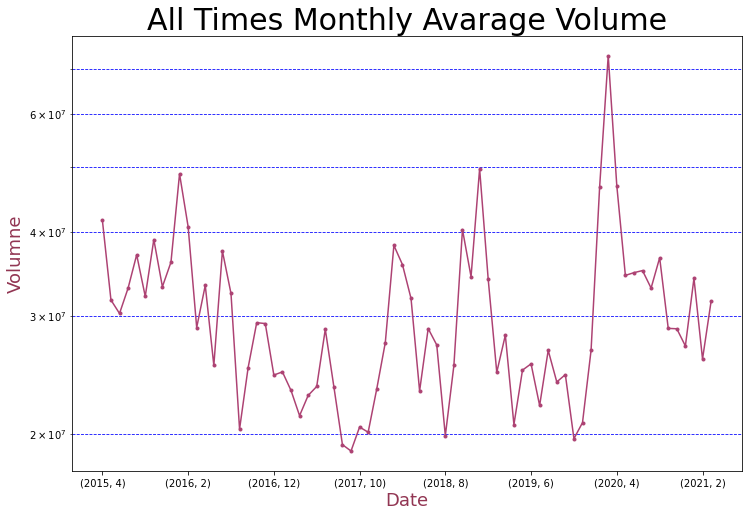

In [9]:
# All times Monthly Avarage Volume
plt.figure(figsize=(12,8))
df.groupby([df.Date.dt.year,df.Date.dt.month])["Volume"].mean().plot(color="#ad4273",marker=".")
plt.xlabel("Date",color="#923653", size=18)
plt.ylabel("Volumne",color="#923653", size=18)
plt.title("All Times Monthly Avarage Volume",size=30)

plt.yscale("log")
plt.grid(color="blue", linestyle="--", which="minor")
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10, color="#3d9f6e") 
plt.show()

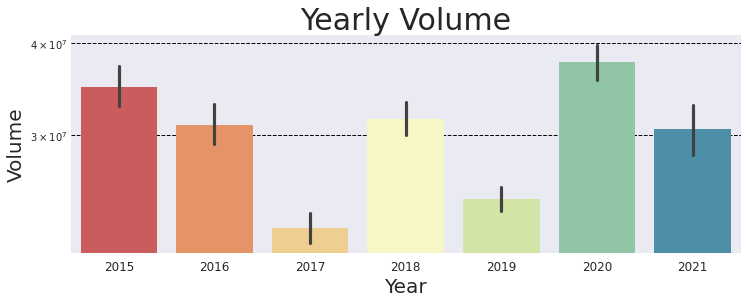

In [10]:
# yearly volumn
plt.style.use("seaborn")
plt.figure(figsize=(12,4))
g = sns.barplot(x=df.Date.dt.year, y=df.Volume, palette="Spectral")
plt.title("Yearly Volume",fontsize=30)
g.set_yscale("log")
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.xlabel("Year",fontsize=20)
plt.ylabel("Volume",fontsize=20)
plt.grid(which="minor",color="black", linestyle="--")
plt.show()